In [1]:
#import thư viện 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
#Hàm sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
data = pd.read_csv('E:/Works/Visual Studio/Artificial Intelligence/Data/Logistic-Regression/dataset.csv').to_numpy()
N, d = data.shape
#mang x chua data
x = data[:,0:d-1].reshape(-1,d-1)
#mang y chua ket qua
y = data[:,d-1].reshape(-1,1)

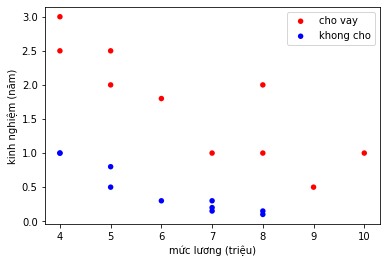

In [4]:
#Vẽ data
#tiền xử lý
x1 = np.compress((np.mod(y[:,0],2) == 1), x, axis=0)
x2 = np.compress((np.mod(y[:,0],2) == 0), x, axis=0)
#ve bang scatter
plt.scatter(x1[:,0],x1[:,1],c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x2[:,0],x2[:,1],c='blue', edgecolors='none', s=30, label='khong cho')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

In [5]:
#thêm cột 1 vào x
X = np.concatenate((np.ones((N, 1)),x), axis = 1)
#khoi tao w
w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [6]:
#Dùng thư viện skilearn
clf = LogisticRegression(random_state=0).fit(x, y.reshape(20,))
clf.score(x,y)

1.0

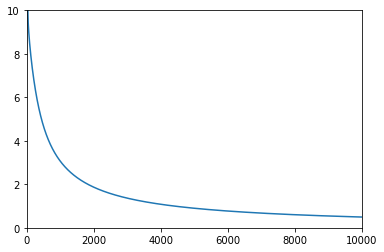

In [7]:
#số lần lặp
number_of_iteration = 10000
#Giá trị mất mát qua mỗi lần lặp
cost = np.zeros((number_of_iteration,1))
learning_rate = 0.01

for i in range(number_of_iteration):
    y_predict = sigmoid(np.dot(X,w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))

    # Gradient descent
    w = w - learning_rate*np.dot(X.T,(y_predict-y))
plt.plot(np.linspace(0,10000,10000,endpoint = True),cost)
plt.axis([0,10000,0,10])
plt.show()

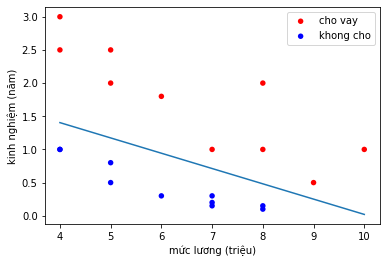

In [14]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x1[:,0],x1[:,1],c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x2[:,0],x2[:,1],c='blue', edgecolors='none', s=30, label='khong cho')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
x_axis = np.linspace(4,10,1000,endpoint=True)
y_axis = -(w[0] + x_axis*w[1]+ np.log(1/t-1))/w[2]
plt.plot(x_axis, y_axis)
plt.show()